In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

%matplotlib inline

In [88]:
class velo:
    '''Class of type velomobile, where A is area, CD is drag coefficient, and eta is drivetrain efficiency.'''
    def __init__(self, CD, A, mass,eta):
        self.CD = CD
        self.A = A
        self.mass = mass
        self.eta = eta
        
def Pd(p,v,A,Cd,eta=.96):
    '''Calculate power to overcome aerodynamic drag.'''
    return .5*p*v**3*A*Cd/eta
def Pr(v,m,Cr,eta=.96):
    '''Calculate power to overcome rolling resistance'''
    return v*m*9.81*Cr/eta
def Pa(v,m,a,eta=.96):
    '''Calculate power to accelerate.'''
    return v*m*a/eta

crr = [.0035,.0039,.005,.0056,.0061,.0063,.0065,.0067,.0069,.0071,.0072]
vs = [0,2,8,12,18,22,27,33,39,46,50]

crr_df = pd.DataFrame(crr, index=vs, columns=['Crr'])
crr_df = crr_df.reindex(np.arange(0,50.01,.01)).interpolate('pchip')
Crr = interp1d(crr_df.index, crr_df['Crr'])

# def Crr(v, crr_df = crr_df):
#     '''Calculate Linearized Coefficient of Rolling Resistance'''
    

    
#     return crr_df.loc[v].values

In [89]:
eta = velo(.0383,.325,100,.97)
naca6 = velo(.0496,.325,100,.97)
custom = velo(.04,.4,100,.97)

In [90]:
def vehicle_df(vehicle):
    
    df = pd.DataFrame(index=np.arange(0,50.1,.1))
    df['Crr'] = Crr(df.index)
    df['Pd'] = Pd(1.07, df.index, vehicle.A, vehicle.CD)
    df['Pr'] = Pr(df.index, vehicle.mass, df['Crr']) 
    df['Pa'] = Pa(df.index, vehicle.mass, .25) 
    df['Pt'] = df[['Pd', 'Pr', 'Pa']].sum(axis=1)
    
    return df

In [91]:
eta_df = pd.DataFrame(index=np.arange(0,50.1,.1))

eta_df['Crr'] = Crr(eta_df.index)
eta_df['Pd'] = Pd(1.07, eta_df.index, eta.A, eta.CD)
eta_df['Pr'] = Pr(eta_df.index, eta.mass, eta_df['Crr']) 
eta_df['Pa'] = Pa(eta_df.index, eta.mass, .25) 
eta_df['Pt'] = eta_df[['Pd', 'Pr', 'Pa']].sum(axis=1)

In [92]:
naca6_df = pd.DataFrame(index=np.arange(0,50.1,.1))

naca6_df['Crr'] = Crr(naca6_df.index)
naca6_df['Pd'] = Pd(1.07, naca6_df.index, naca6.A, naca6.CD)
naca6_df['Pr'] = Pr(naca6_df.index, naca6.mass, naca6_df['Crr']) 
naca6_df['Pa'] = Pa(naca6_df.index, naca6.mass, .25) 
naca6_df['Pt'] = naca6_df[['Pd', 'Pr', 'Pa']].sum(axis=1)

In [93]:
custom_df = vehicle_df(custom)

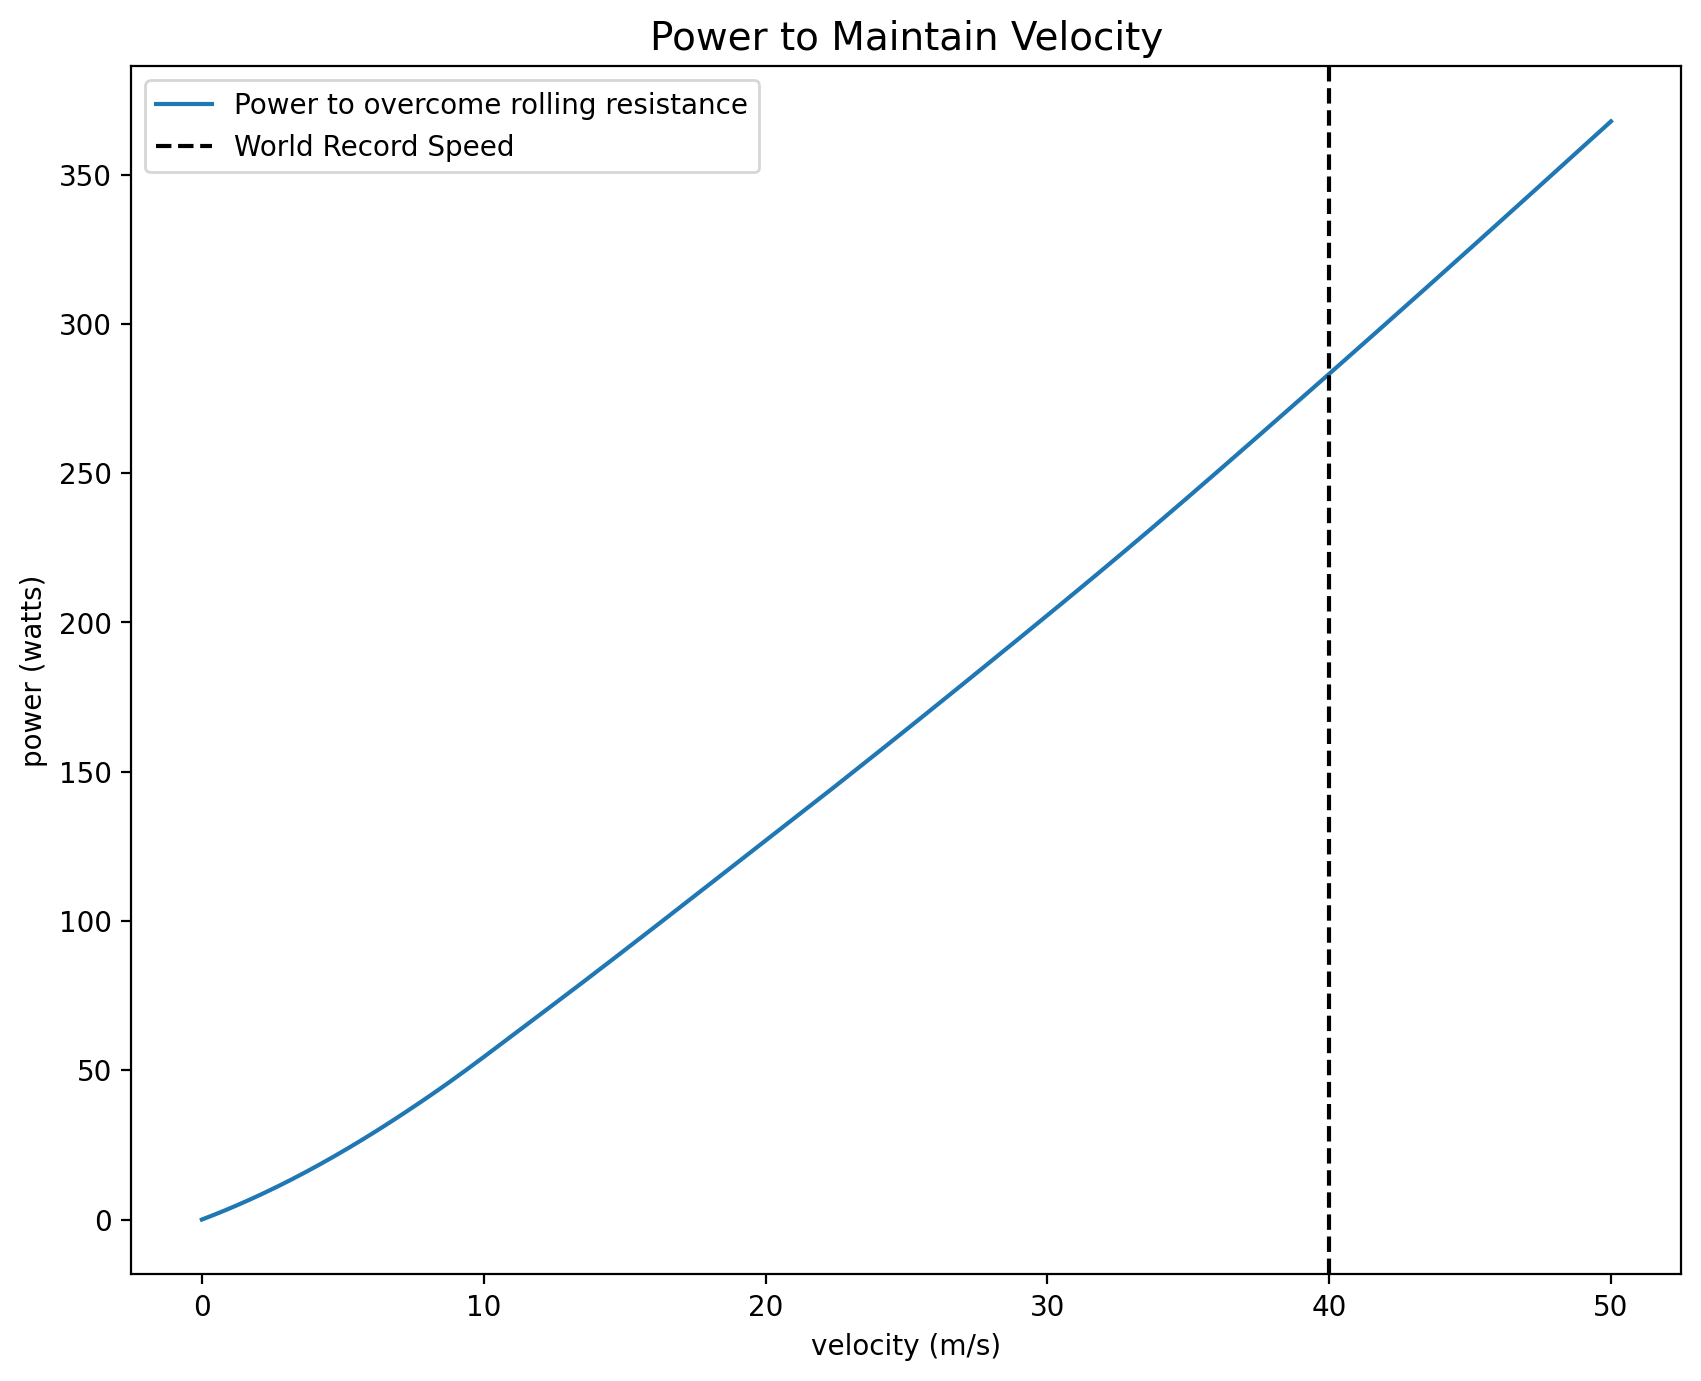

In [94]:
plt.figure(figsize=[10,8], dpi=200)
#plt.plot(custom_df['Pd'], label='Power to overcome drag')
plt.plot(custom_df['Pr'], label='Power to overcome rolling resistance')
#plt.plot(custom_df['Pa'], label='Power to accelerate')
#plt.plot(custom_df['Pt'], label='Power Total')
#plt.plot(custom_df['Pd'] + custom_df['Pr'], label='Power Sum')
plt.axvline(40, label='World Record Speed', c='k', ls='--')
#plt.axvline(44.704, label='100mph', c='grey', ls='--')
#plt.axhline(1300, label='1300 watts', c='k', ls='--')
plt.legend()
plt.ylabel('power (watts)'); plt.xlabel('velocity (m/s)')
plt.title('Power to Maintain Velocity', size=14);

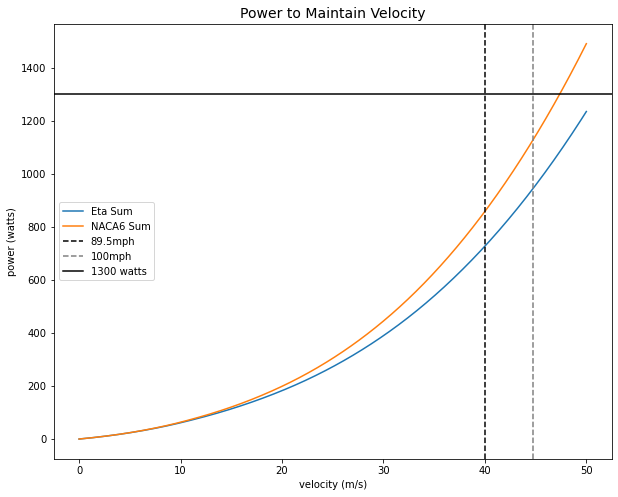

In [95]:
plt.figure(figsize=[10,8])
plt.plot(eta_df['Pd'] + eta_df['Pr'], label='Eta Sum')
plt.plot(naca6_df['Pd'] + naca6_df['Pr'], label='NACA6 Sum')
plt.axvline(40, label='89.5mph', c='k', ls='--')
plt.axvline(44.704, label='100mph', c='grey', ls='--')
plt.axhline(1300, label='1300 watts', c='k')
plt.legend()
plt.ylabel('power (watts)'); plt.xlabel('velocity (m/s)')
plt.title('Power to Maintain Velocity', size=14);

# Cyclist Capabilities Table

In [96]:
import requests
url="https://www.cyclinganalytics.com/blog/2018/06/how-does-your-cycling-power-output-compare"

# Make a GET request to fetch the raw HTML content
r = requests.get(url).text

In [97]:
table_list = pd.read_html(r)
cc = table_list[0]

In [98]:
ccw = cc['watts']
ccwkg = cc['watts per kilogram']
ccw.index = ccwkg.index = cc['Unnamed: 0_level_0']['%']

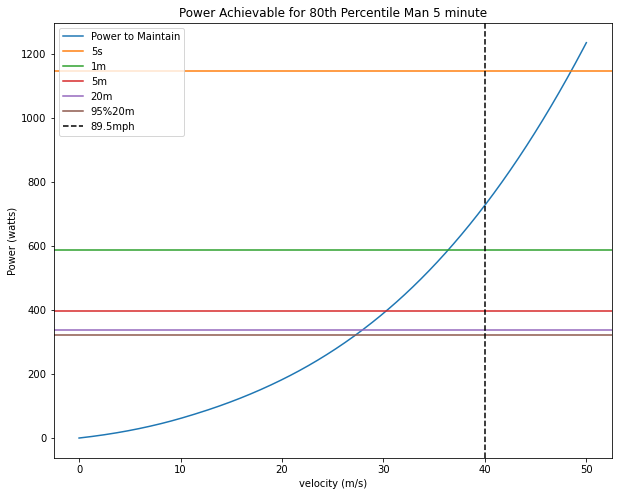

In [99]:
plt.figure(figsize=[10,8])
plt.plot(eta_df[['Pd', 'Pr']].sum(axis=1), label='Power to Maintain')
for i,each in enumerate(ccwkg.loc[80]):
    plt.axhline(75*each, label=ccwkg.loc[80].index[i], c='C'+str(i+1))
plt.axvline(40, label='89.5mph', c='k', ls='--')
plt.title('Power Achievable for 80th Percentile Man 5 minute');
plt.legend()
plt.ylabel('Power (watts)'); plt.xlabel('velocity (m/s)');

# Cyclist Power Capabilites over Time

In [100]:
cyclist_power = pd.DataFrame([x[:4] for x in ccwkg.values]).transpose()
cyclist_power.index = [5,60,5*60,20*60]
cyclist_power.columns = ccwkg.index
cyclist_power

%,99,98,95,90,80,70,60,50,40,30,20,10,5
5,19.80,19.01,17.84,16.74,15.30,14.13,13.13,12.14,11.24,10.43,9.28,7.66,6.26
60,10.29,9.58,9.11,8.55,7.84,7.35,6.92,6.49,6.14,5.73,5.23,4.48,3.90
300,6.81,6.43,6.03,5.73,5.30,5.01,4.74,4.48,4.24,3.99,3.72,3.21,2.86
1200,5.80,5.41,5.13,4.86,4.50,4.23,3.99,3.80,3.60,3.38,3.11,2.71,2.39


In [101]:
cpi =cyclist_power.reindex(np.arange(5,20*60+1,1)).copy()
cpi.interpolate(method='pchip',inplace=True)

cpif={}
for each in cpi.columns:
    cpif[each] = interp1d(cpi.index, cpi[each], axis=0)

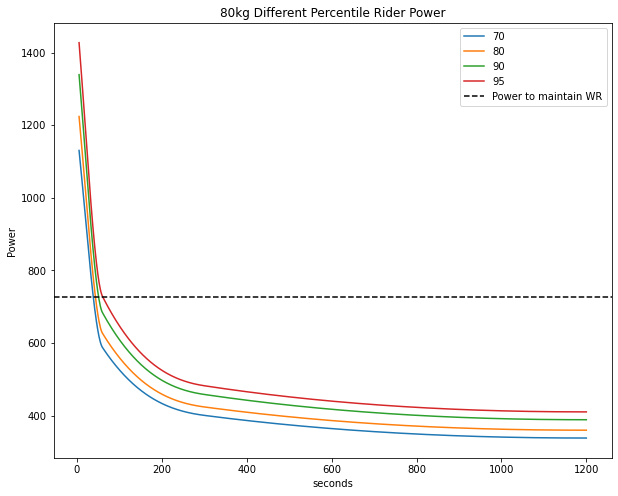

In [102]:
weight = 80
plt.figure(figsize=[10,8])
for percentage in [70,80,90,95]:
    plt.plot(cpi[percentage]*weight, label=percentage)
    #plt.fill_between(cpi.index, [0]*(len(cpi.index+1)),cpi[percentage]*weight, alpha=.1)
plt.axhline(eta_df[eta_df.index == 40][['Pd','Pr']].sum(axis=1).values[0], label='Power to maintain WR', ls='--', c='k')
plt.title(str(weight)+'kg Different Percentile Rider Power')
plt.xlabel('seconds'); plt.ylabel('Power')
plt.legend()
plt.show()

# Stepped Speed Solving

In [103]:
def next_velocity(time_delta, current_velocity, power_in, vehicle, density=1.07):
    PR=Pr(v=current_velocity, m=vehicle.mass, Cr=Crr(current_velocity), eta=vehicle.eta)
    PD=Pd(p=density,v=current_velocity,A=vehicle.A, Cd=vehicle.CD, eta=vehicle.eta)
    PA = (power_in - PR - PD)*vehicle.eta
    A = PA/(vehicle.mass*current_velocity)
    NV = current_velocity+A*time_delta
    return NV, PA, PD, PR

In [104]:
ts=.01
rkg = 80
input_df = pd.DataFrame(index=np.arange(0,5*60.01,ts))
input_df['power'] = ccwkg.loc[rkg]['5m']*rkg
#input_df['power'].loc[:1*60] = ccwkg.loc[80]['95%20m']*rkg
#input_df['power'].loc[5*60:] = ccwkg.loc[80]['1m']*rkg
#input_df['power'].iloc[-500:] = ccwkg.loc[80]['5s']*rkg

In [105]:
vel=.1
velocities = []
pas = []
pds = []
prs = []

for input_power in input_df['power']:
    n_vel, PA, PD, PR = next_velocity(.01,vel,input_power,naca6)
    velocities.append(n_vel)
    pas.append(PA)
    prs.append(PR)
    pds.append(PD)
    vel=n_vel

In [106]:
input_df['velocity'] = velocities
input_df['pa'] = pas
input_df['pd'] = pds
input_df['pr'] = prs

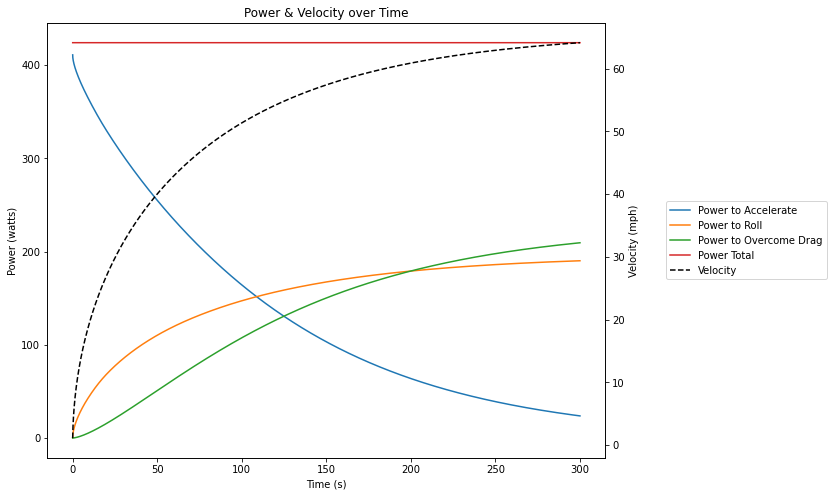

In [107]:
fig, ax1 = plt.subplots(figsize=[10,8])
ax1.plot(input_df['pa'], label='Power to Accelerate')
ax1.plot(input_df['pr'], label='Power to Roll')
ax1.plot(input_df['pd'], label='Power to Overcome Drag')
ax1.plot(input_df['power'], label='Power Total')
ax1.set_ylabel('Power (watts)'); ax1.set_xlabel('Time (s)');
ax2 = ax1.twinx()
#ax2.axhline(40*2.236936, label='89.5mph', c='grey', ls='--')
ax2.plot(input_df['velocity']*2.236936, c='k', ls='--', label='Velocity')
ax2.set_ylabel('Velocity (mph)')
fig.legend(loc='center left',bbox_to_anchor=(1.1,.5), bbox_transform=ax1.transAxes)
plt.title('Power & Velocity over Time');

In [108]:
input_df['velocity'].tail(1)*2.236936

300.04    64.121597
Name: velocity, dtype: float64

# Tire Rolling Resistance

http://www.biketechreview.com/tires_old/images/AFM_tire_testing_rev9.pdf

In [109]:
crr = [.0035,.0039,.005,.0056,.0061,.0063,.0065,.0067,.0069,.0071,.0072]
v= [0,2,8,12,18,22,27,33,39,46,50]

crr_df = pd.DataFrame(crr, index=v, columns=['Crr'])

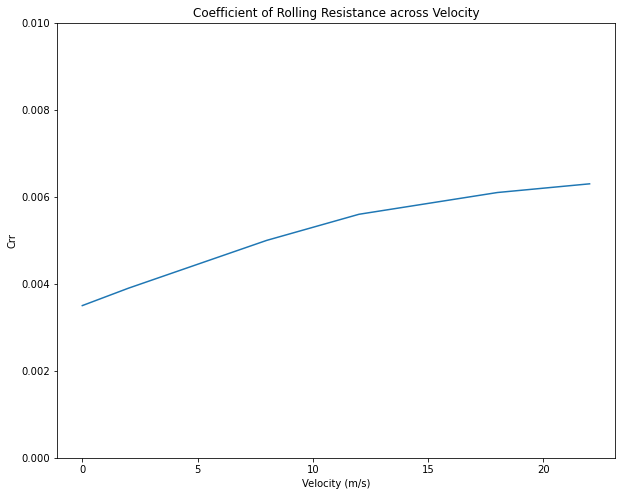

In [110]:
plt.figure(figsize=[10,8])
plt.plot(crr_df['Crr'][:-5])
plt.ylim(0,.01)
#plt.plot(crr_df.reindex(np.arange(0,50.01,.01)).interpolate('pchip'))
plt.title('Coefficient of Rolling Resistance across Velocity')
plt.xlabel('Velocity (m/s)'); plt.ylabel('Crr');

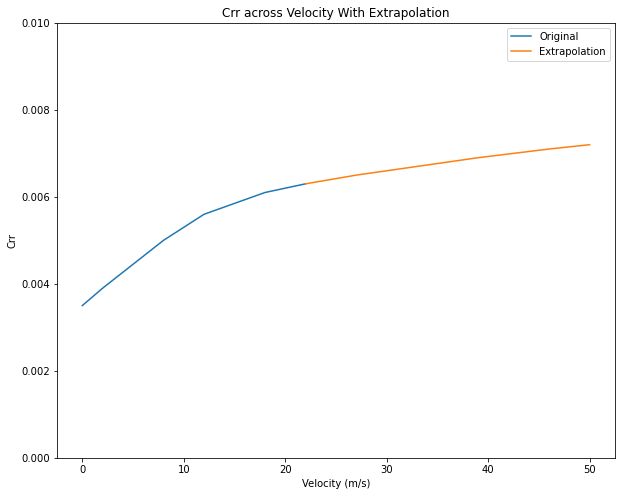

In [111]:
plt.figure(figsize=[10,8])
plt.plot(crr_df['Crr'][:-5])
plt.plot(crr_df['Crr'][-6:])
plt.ylim(0,.01)
plt.legend(['Original', 'Extrapolation'])
plt.title('Crr across Velocity With Extrapolation')
plt.xlabel('Velocity (m/s)'); plt.ylabel('Crr');

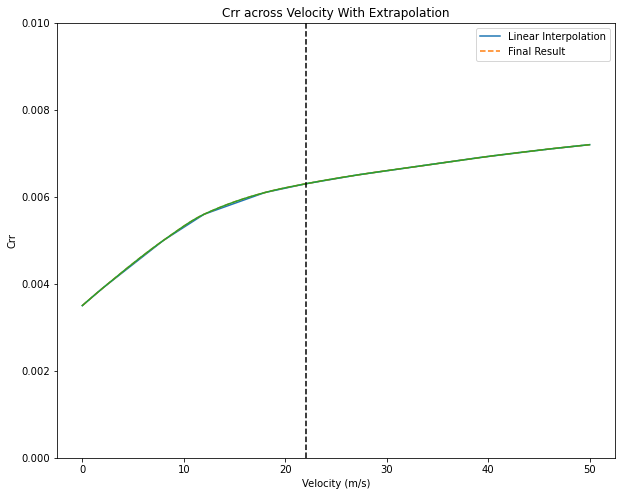

In [112]:
plt.figure(figsize=[10,8])
plt.plot(crr_df['Crr'])
plt.ylim(0,.01)
plt.plot(crr_df.reindex(np.arange(0,50.01,.01)).interpolate('pchip'), ls='--')
plt.plot(np.arange(0,50.01,.01),Crr(np.arange(0,50.01,.01)))
plt.axvline(crr_df.index[5], ls='--', c='k')
plt.legend(['Linear Interpolation', 'Final Result'])
plt.title('Crr across Velocity With Extrapolation')
plt.xlabel('Velocity (m/s)'); plt.ylabel('Crr');

In [113]:
powers = pd.DataFrame(index=np.arange(0,50.01,.01))

In [115]:
pds=[]
pr=[]
for v in powers.index:
    pds.append(Pd(1.07, v, custom.A, custom.CD, custom.eta))
    pr.append(Pr(v, custom.mass, Crr(v), custom.eta))    
    
powers['Pd'] = pds
powers['Pr'] = pr
powers['Pt'] = powers['Pd'] + powers['Pr']

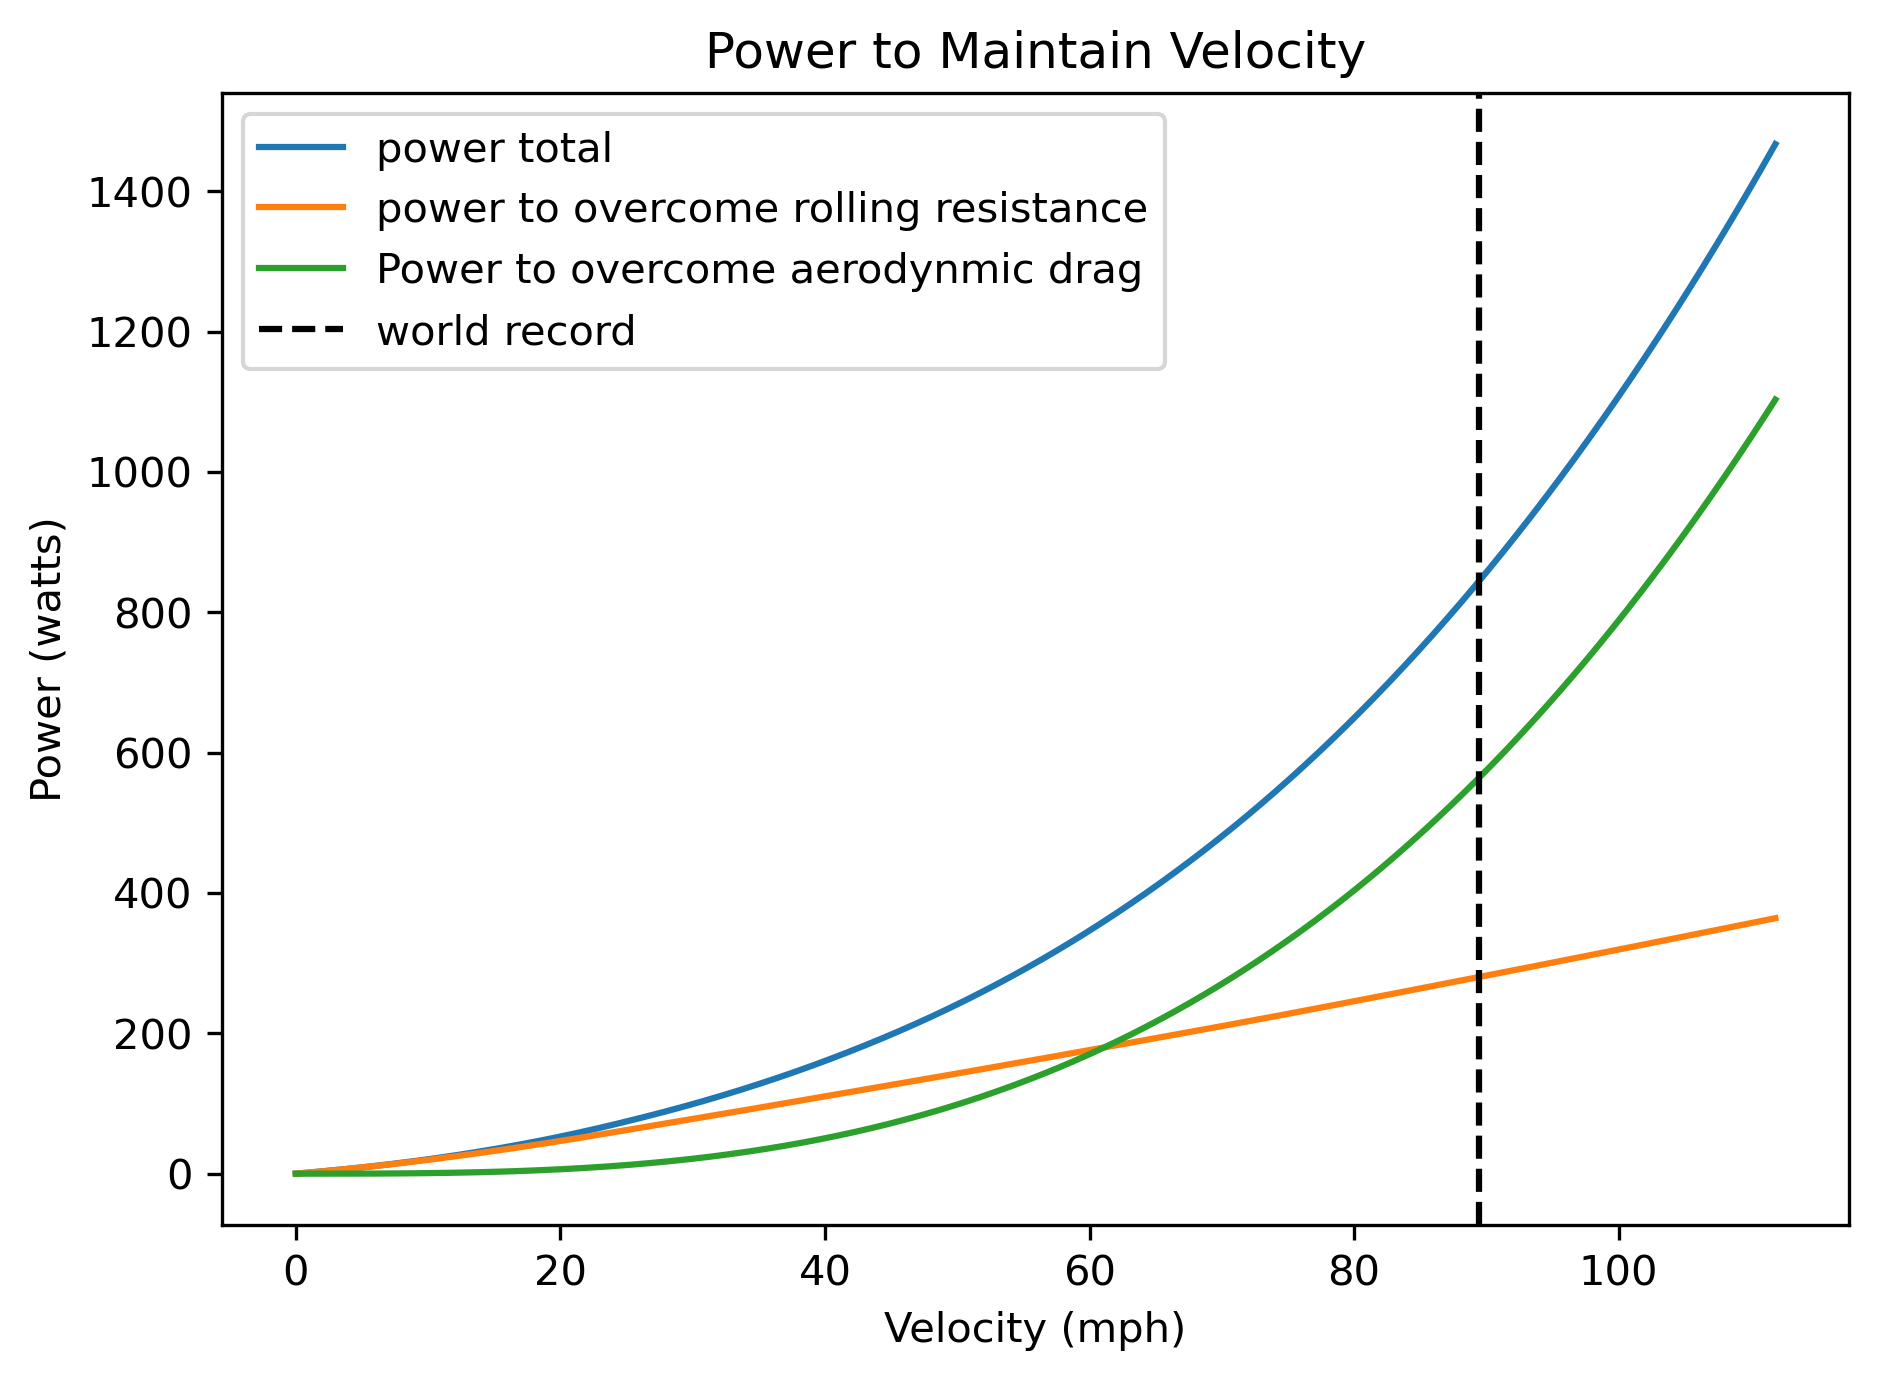

In [116]:
plt.figure(figsize=[7,5], dpi=300)
plt.plot(powers.index*2.236936,powers['Pt'], label='power total')
plt.plot(powers.index*2.236936,powers['Pr'], label='power to overcome rolling resistance')
plt.plot(powers.index*2.236936,powers['Pd'], label='Power to overcome aerodynmic drag')
plt.axvline(40*2.236936, c='k', ls='--', label='world record')
plt.legend(); plt.xlabel('Velocity (mph)'); plt.ylabel('Power (watts)');
plt.title('Power to Maintain Velocity')
plt.show()

# Stepped Speed Solving Cont.

In [210]:
rkg = 80
maxtime = 12*60
ts=.01
power_func = pd.DataFrame(index=np.arange(0,maxtime+ts,ts), columns=['powerin'])
power_func['powerin'].loc[0] = cpif[80](20*60)*rkg*0
power_func['powerin'].loc[4*60] = cpif[80](10*60)*rkg
power_func['powerin'].loc[8*60] = cpif[80](10*60)*rkg
power_func['powerin'].loc[9*60] = cpif[80](5*60)*rkg
power_func['powerin'].loc[10*60] = cpif[80](3*60)*rkg
power_func['powerin'].loc[11*60] = cpif[80](2*60)*rkg
power_func['powerin'].loc[12*60-5] = cpif[80](20)*rkg
power_func['powerin'].loc[maxtime] = cpif[80](5)*rkg
power_func['powerin'] = power_func['powerin'].astype('float64')
power_func = power_func.interpolate()

In [211]:
def step_speeds(ts, rkg, input_df):
    vel=.1
    velocities = []
    pas = []
    pds = []
    prs = []

    for input_power in input_df['powerin']:
        n_vel, PA, PD, PR = next_velocity(ts,vel,input_power,naca6)
        velocities.append(n_vel)
        pas.append(PA)
        prs.append(PR)
        pds.append(PD)
        vel=n_vel

    input_df['velocity'] = velocities
    input_df['pa'] = pas
    input_df['pd'] = pds
    input_df['pr'] = prs
    
    return input_df

In [212]:
input_df = step_speeds(.01,80,power_func)

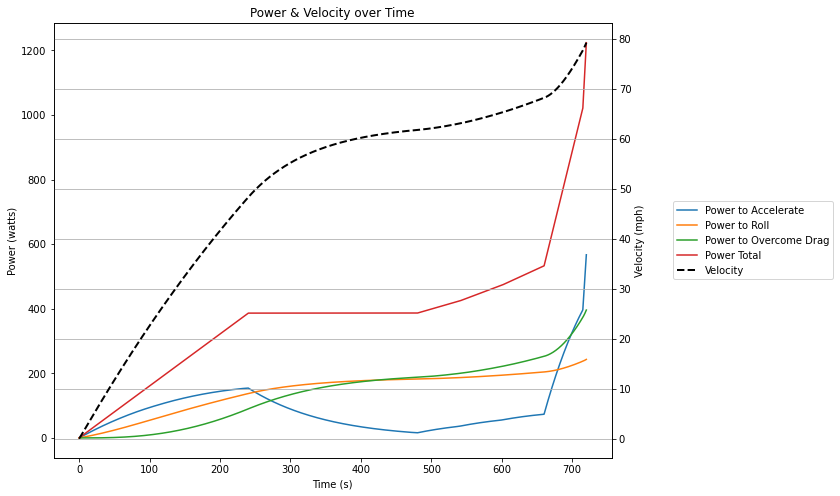

In [213]:
fig, ax1 = plt.subplots(figsize=[10,8])
ax1.plot(input_df['pa'], label='Power to Accelerate')
ax1.plot(input_df['pr'], label='Power to Roll')
ax1.plot(input_df['pd'], label='Power to Overcome Drag')
ax1.plot(input_df['powerin'], label='Power Total')
ax1.set_ylabel('Power (watts)'); ax1.set_xlabel('Time (s)');
ax2 = ax1.twinx()
#ax2.axhline(40*2.236936, label='89.5mph', c='grey', ls='--')
ax2.plot(input_df['velocity']*2.236936, c='k', ls='--', label='Velocity', lw=2)
ax2.set_ylabel('Velocity (mph)')
fig.legend(loc='center left',bbox_to_anchor=(1.1,.5), bbox_transform=ax1.transAxes)
plt.grid()
plt.title('Power & Velocity over Time');

In [234]:
cpif[95](39)*75

844.9809824956619